In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'malus.csv'
fr = pd.read_csv(FILE)

In [26]:
α = np.array(fr['teta (deg)']) * np.pi / 180 # rad
V = np.array(fr['V (Volt)']) # Volt
sigmaV = np.array(fr['sigmaV']) # Volt

In [27]:
def legge_malus(α,I0):
    return I0 * np.cos(α)**2

def campo_polarizzato(α,E0):
    return E0 * np.cos(α)

In [28]:
malus_i = Interpolazione(α, V, campo_polarizzato, sigmaV,[0])

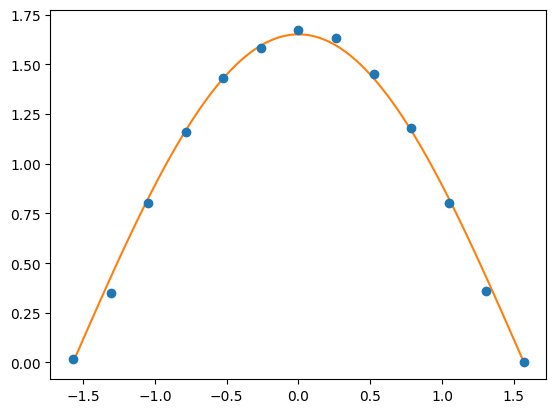

In [29]:
plt.errorbar(α, V, yerr=sigmaV, fmt='o', label='data')
plt.plot(malus_i.x_best,malus_i.y_best, label='fit')
plt.show()